# First one same as lecture

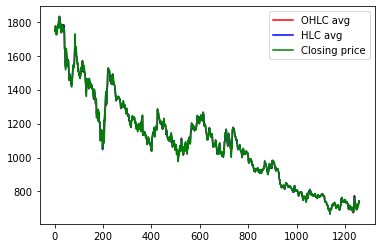

In [25]:
# IMPORTING IMPORTANT LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import LSTM
import preprocessing 

# FOR REPRODUCIBILITY
np.random.seed(7)

# IMPORTING DATASET 
dataset = pd.read_csv('Google_Stock_Price_Trainset.csv', usecols=[1,2,3,4])
dataset = dataset.reindex(index = dataset.index[::-1])
testdataset = pd.read_csv('Google_Stock_Price_Testset.csv', usecols=[1,2,3,4])
# CREATING OWN INDEX FOR FLEXIBILITY
obs = np.arange(1, len(dataset) + 1, 1)

# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg = dataset.mean(axis = 1)
HLC_avg = dataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val = dataset[['Close']]

# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs, OHLC_avg, 'r', label = 'OHLC avg')
plt.plot(obs, HLC_avg, 'b', label = 'HLC avg')
plt.plot(obs, close_val, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

# PREPARATION OF TIME SERIES DATASE
OHLC_avg = np.reshape(OHLC_avg.values, (len(OHLC_avg),1)) # 1664
scaler = MinMaxScaler(feature_range=(0, 1))
OHLC_avg = scaler.fit_transform(OHLC_avg)

# TRAIN-TEST SPLIT
train_OHLC = int(len(dataset) * 1)
test_OHLC = len(OHLC_avg) - train_OHLC
train_OHLC, test_OHLC = OHLC_avg[0:train_OHLC,:], OHLC_avg[train_OHLC:len(OHLC_avg),:]

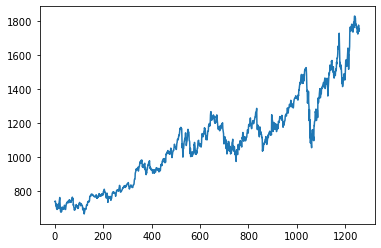

In [26]:
plt.plot(dataset['Close'])

In [27]:
test_OHLC.shape

(0, 1)

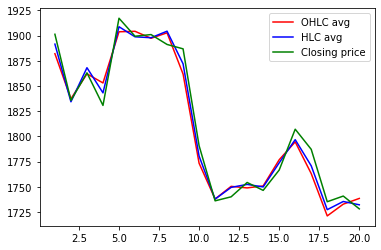

In [28]:
# IMPORTING DATASET 

testdataset = pd.read_csv('Google_Stock_Price_Testset.csv', usecols=[1,2,3,4])
testdataset = testdataset.reindex(index = testdataset.index[::-1])
# CREATING OWN INDEX FOR FLEXIBILITY
obs2 = np.arange(1, len(testdataset) + 1, 1)

# TAKING DIFFERENT INDICATORS FOR PREDICTION
OHLC_avg2 = testdataset.mean(axis = 1)
HLC_avg2 = testdataset[['High', 'Low', 'Close']].mean(axis = 1)
close_val2 = testdataset[['Close']]

# PLOTTING ALL INDICATORS IN ONE PLOT
plt.plot(obs2, OHLC_avg2, 'r', label = 'OHLC avg')
plt.plot(obs2, HLC_avg2, 'b', label = 'HLC avg')
plt.plot(obs2, close_val2, 'g', label = 'Closing price')
plt.legend(loc = 'upper right')
plt.show()

# PREPARATION OF TIME SERIES DATASE
OHLC_avg2 = np.reshape(OHLC_avg2.values, (len(OHLC_avg2),1)) # 1664
scaler2 = MinMaxScaler(feature_range=(0, 1))
OHLC_avg2 = scaler.fit_transform(OHLC_avg2)

# TRAIN-TEST SPLIT
train_OHLC2 = int(len(OHLC_avg2) * 0)
test_OHLC2 = len(OHLC_avg2) - train_OHLC2
train_OHLC2, test_OHLC2 = OHLC_avg2[0:train_OHLC2,:], OHLC_avg2[train_OHLC2:len(OHLC_avg2),:]

In [29]:
train_OHLC2.shape

(0, 1)

In [30]:
test_OHLC2.shape

(20, 1)

### Data pre-processing and reshaping

In [31]:
# TIME-SERIES DATASET (FOR TIME T, VALUES FOR TIME T+1)
trainX, trainY = preprocessing.new_dataset(train_OHLC, 1)
testX, testY = preprocessing.new_dataset(test_OHLC2, 1)

# RESHAPING TRAIN AND TEST DATA
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))
step_size = 1

In [32]:
testX.shape

(18, 1, 1)

In [33]:
trainX.shape

(1257, 1, 1)

### model declaration, compile and fit.

In [34]:
# LSTM MODEL
model = Sequential()
model.add(LSTM(32, input_shape=(1, step_size), return_sequences = True))
model.add(LSTM(16))
model.add(Dense(1))
model.add(Activation('linear'))

# MODEL COMPILING AND TRAINING
model.compile(loss='mean_squared_error', optimizer='adam') # Try SGD, adam, adagrad and compare!!!
model.fit(trainX, trainY, epochs=50, batch_size=4, verbose=1)


Epoch 1/50
315/315 [==============================] - 5s 7ms/step - loss: 0.0338
Epoch 2/50
315/315 [==============================] - 2s 7ms/step - loss: 9.2807e-04
Epoch 3/50
315/315 [==============================] - 2s 7ms/step - loss: 6.2306e-04
Epoch 4/50
315/315 [==============================] - 2s 6ms/step - loss: 3.9127e-04
Epoch 5/50
315/315 [==============================] - 2s 6ms/step - loss: 2.8660e-04
Epoch 6/50
315/315 [==============================] - 2s 6ms/step - loss: 2.4437e-04
Epoch 7/50
315/315 [==============================] - 2s 6ms/step - loss: 2.0912e-04
Epoch 8/50
315/315 [==============================] - 2s 6ms/step - loss: 2.1641e-04
Epoch 9/50
315/315 [==============================] - 2s 6ms/step - loss: 1.9889e-04
Epoch 10/50
315/315 [==============================] - 2s 6ms/step - loss: 2.2615e-04
Epoch 11/50
315/315 [==============================] - 2s 6ms/step - loss: 2.2742e-04
Epoch 12/50
315/315 [==============================] - 2s 7ms/step 

In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 32)             4352      
                                                                 
 lstm_3 (LSTM)               (None, 16)                3136      
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
 activation_1 (Activation)   (None, 1)                 0         
                                                                 
Total params: 7,505
Trainable params: 7,505
Non-trainable params: 0
_________________________________________________________________


In [36]:
trainX.shape

(1257, 1, 1)

In [37]:
trainY.shape

(1257,)

In [38]:
testX.shape

(18, 1, 1)

In [39]:
testY.shape

(18,)

#### Prediction and normalization

In [40]:
# PREDICTION
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

# DE-NORMALIZING FOR PLOTTING
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

1/1 [==============================] - 0s 21ms/step


### Training and testing MSE analysis

In [41]:
# TRAINING RMSE
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train RMSE: %.2f' % (trainScore))

# TEST RMSE
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test RMSE: %.2f' % (testScore))

# CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
trainPredictPlot = np.empty_like(OHLC_avg)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
testPredictPlot = np.empty_like(testPredict)#
testPredictPlot[:, :] = np.nan
testPredictPlot[:, :]=testPredict #len(testPredict)+(step_size*2)+1:len(OHLC_avg2)-1

# DE-NORMALIZING MAIN DATASET 
OHLC_avg = scaler.inverse_transform(OHLC_avg)
#OHLC_avg2 = scaler.inverse_transform(OHLC_avg2)

Train RMSE: 2.57
Test RMSE: 33.28


In [252]:
# # TRAINING RMSE
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train RMSE: %.2f' % (trainScore))

# # TEST RMSE
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('Test RMSE: %.2f' % (testScore))

# # CREATING SIMILAR DATASET TO PLOT TRAINING PREDICTIONS
# trainPredictPlot = np.empty_like(OHLC_avg)
# trainPredictPlot[:, :] = np.nan
# trainPredictPlot[step_size:len(trainPredict)+step_size, :] = trainPredict

# # CREATING SIMILAR DATASSET TO PLOT TEST PREDICTIONS
# testPredictPlot = np.empty_like(test_OHLC2)#
# testPredictPlot[:, :] = np.nan
# testPredictPlot[step_size+1:len(trainPredict)+step_size , :]=testPredict #len(testPredict)+(step_size*2)+1:len(OHLC_avg2)-1
# #testPredictPlot[step_size+1:len(trainPredict)+step_size , :]=testPredict
# # DE-NORMALIZING MAIN DATASET 
# OHLC_avg = scaler.inverse_transform(OHLC_avg)
# OHLC_avg2 = scaler.inverse_transform(OHLC_avg2)

Train RMSE: 2.76
Test RMSE: 32.66


#### plot results

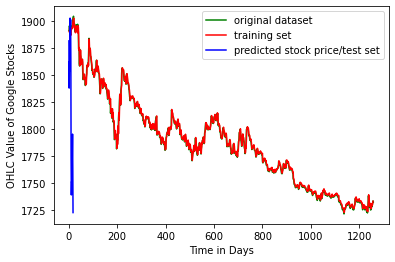

1/1 [==============================] - 0s 23ms/step
Last Day Value: 1722.4642333984375
Next Day Value: 1705.898681640625


In [42]:
# PLOT OF MAIN OHLC VALUES, TRAIN PREDICTIONS AND TEST PREDICTIONS
plt.plot(OHLC_avg, 'g', label = 'original dataset')
plt.plot(trainPredictPlot, 'r', label = 'training set')
plt.plot(testPredictPlot, 'b', label = 'predicted stock price/test set')
plt.legend(loc = 'upper right')
plt.xlabel('Time in Days')
plt.ylabel('OHLC Value of Google Stocks')
plt.show()

# PREDICT FUTURE VALUES
last_val = testPredict[-1]
last_val_scaled = last_val/last_val
next_val = model.predict(np.reshape(last_val_scaled, (1,1,1)))
print ("Last Day Value:", np.ndarray.item(last_val))
print ("Next Day Value:", np.ndarray.item(last_val*next_val))
# print np.append(last_val, next_val)

# Second Part

In [15]:
hotel_df = pd.read_csv('Seattle_Hotels.csv', encoding="latin-1")
all_descriptions = all_descriptions = list(hotel_df.desc.values)
all_descriptions

["Located on the southern tip of Lake Union, the Hilton Garden Inn Seattle Downtown hotel is perfectly located for business and leisure. \nThe neighborhood is home to numerous major international companies including Amazon, Google and the Bill & Melinda Gates Foundation. A wealth of eclectic restaurants and bars make this area of Seattle one of the most sought out by locals and visitors. Our proximity to Lake Union allows visitors to take in some of the Pacific Northwest's majestic scenery and enjoy outdoor activities like kayaking and sailing. over 2,000 sq. ft. of versatile space and a complimentary business center. State-of-the-art A/V technology and our helpful staff will guarantee your conference, cocktail reception or wedding is a success. Refresh in the sparkling saltwater pool, or energize with the latest equipment in the 24-hour fitness center. Tastefully decorated and flooded with natural light, our guest rooms and suites offer everything you need to relax and stay productive

In [16]:
from keras.preprocessing.text import Tokenizer

In [17]:
corpus = [x for x in all_descriptions]    # all_description is the input’s descritption as list.

corpus[:1]

t = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

t.fit_on_texts(corpus)

In [18]:
corpus

["Located on the southern tip of Lake Union, the Hilton Garden Inn Seattle Downtown hotel is perfectly located for business and leisure. \nThe neighborhood is home to numerous major international companies including Amazon, Google and the Bill & Melinda Gates Foundation. A wealth of eclectic restaurants and bars make this area of Seattle one of the most sought out by locals and visitors. Our proximity to Lake Union allows visitors to take in some of the Pacific Northwest's majestic scenery and enjoy outdoor activities like kayaking and sailing. over 2,000 sq. ft. of versatile space and a complimentary business center. State-of-the-art A/V technology and our helpful staff will guarantee your conference, cocktail reception or wedding is a success. Refresh in the sparkling saltwater pool, or energize with the latest equipment in the 24-hour fitness center. Tastefully decorated and flooded with natural light, our guest rooms and suites offer everything you need to relax and stay productive

In [19]:

corpus[:1]

["Located on the southern tip of Lake Union, the Hilton Garden Inn Seattle Downtown hotel is perfectly located for business and leisure. \nThe neighborhood is home to numerous major international companies including Amazon, Google and the Bill & Melinda Gates Foundation. A wealth of eclectic restaurants and bars make this area of Seattle one of the most sought out by locals and visitors. Our proximity to Lake Union allows visitors to take in some of the Pacific Northwest's majestic scenery and enjoy outdoor activities like kayaking and sailing. over 2,000 sq. ft. of versatile space and a complimentary business center. State-of-the-art A/V technology and our helpful staff will guarantee your conference, cocktail reception or wedding is a success. Refresh in the sparkling saltwater pool, or energize with the latest equipment in the 24-hour fitness center. Tastefully decorated and flooded with natural light, our guest rooms and suites offer everything you need to relax and stay productive

In [20]:
# A dictionary of words and their counts.

print(t.word_counts)

# A dictionary of words and how many documents each appeared in.

print(t.word_docs)

# An integer count of the total number of documents that were used to fit the Tokenizer (i.e. total number of documents)

print(t.document_count)

# A dictionary of words and their uniquely assigned integers.

print(t.word_index)
print('Found %s unique tokens.' % len(t.word_index))

OrderedDict([('located', 107), ('on', 128), ('the', 1245), ('southern', 1), ('tip', 1), ('of', 531), ('lake', 41), ('union', 32), ('hilton', 11), ('garden', 11), ('inn', 83), ('seattle', 470), ('downtown', 131), ('hotel', 280), ('is', 269), ('perfectly', 6), ('for', 215), ('business', 87), ('and', 1055), ('leisure', 18), ('neighborhood', 32), ('home', 57), ('to', 471), ('numerous', 1), ('major', 12), ('international', 32), ('companies', 6), ('including', 47), ('amazon', 19), ('google', 5), ('bill', 4), ('melinda', 4), ('gates', 5), ('foundation', 4), ('a', 611), ('wealth', 1), ('eclectic', 8), ('restaurants', 35), ('bars', 7), ('make', 43), ('this', 63), ('area', 43), ('one', 74), ('most', 40), ('sought', 1), ('out', 23), ('by', 71), ('locals', 5), ('visitors', 4), ('our', 355), ('proximity', 7), ('allows', 3), ('take', 31), ('in', 443), ('some', 22), ('pacific', 42), ("northwest's", 1), ('majestic', 4), ('scenery', 2), ('enjoy', 93), ('outdoor', 23), ('activities', 8), ('like', 44), (

In [21]:
  # Tokenization

t = Tokenizer(num_words=None, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True, split=' ', char_level=False, oov_token=None, document_count=0)

def get_sequence_of_tokens(corpus):

    t.fit_on_texts(corpus)

    total_words = len(t.word_index) + 1

    input_sequences = []

    for line in corpus:

        token_list = t.texts_to_sequences([line])[0]

        for i in range(1, len(token_list)):

            n_gram_sequence = token_list[:i+1]

            input_sequences.append(n_gram_sequence)

    return input_sequences, total_words

 

input_sequences, total_words = get_sequence_of_tokens(corpus)



print(total_words)

3421


In [22]:
input_sequences[:10]

[[24, 21],
 [24, 21, 1],
 [24, 21, 1, 1734],
 [24, 21, 1, 1734, 1735],
 [24, 21, 1, 1734, 1735, 4],
 [24, 21, 1, 1734, 1735, 4, 81],
 [24, 21, 1, 1734, 1735, 4, 81, 111],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1, 330],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1, 330, 331]]

In [23]:
input_sequences

[[24, 21],
 [24, 21, 1],
 [24, 21, 1, 1734],
 [24, 21, 1, 1734, 1735],
 [24, 21, 1, 1734, 1735, 4],
 [24, 21, 1, 1734, 1735, 4, 81],
 [24, 21, 1, 1734, 1735, 4, 81, 111],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1, 330],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1, 330, 331],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1, 330, 331, 37],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1, 330, 331, 37, 6],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1, 330, 331, 37, 6, 20],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1, 330, 331, 37, 6, 20, 9],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1, 330, 331, 37, 6, 20, 9, 11],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1, 330, 331, 37, 6, 20, 9, 11, 547],
 [24, 21, 1, 1734, 1735, 4, 81, 111, 1, 330, 331, 37, 6, 20, 9, 11, 547, 24],
 [24,
  21,
  1,
  1734,
  1735,
  4,
  81,
  111,
  1,
  330,
  331,
  37,
  6,
  20,
  9,
  11,
  547,
  24,
  15],
 [24,
  21,
  1,
  1734,
  1735,
  4,
  81,
  111,
  1,
  330,
  331,
  37,
  6,
  20,
  9,
  11,
  547,
  24,
 

In [24]:
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Embedding, LSTM, Dense, Dropout,SimpleRNN, GRU
from keras.preprocessing.text import Tokenizer
from keras.callbacks import EarlyStopping
from keras.models import Sequential
import keras.utils as ku 
import pandas as pd
import numpy as np
import string, os 
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

In [25]:
# pad sequences

def generate_padded_sequences(input_sequences):

    max_sequence_len = max([len(x) for x in input_sequences])

    input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len, padding = 'pre'))

    predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

    label = ku.to_categorical(label, num_classes = total_words)

   

    return predictors, label, max_sequence_len

 

predictors, label, max_sequence_len = generate_padded_sequences(input_sequences)

# First Model

In [26]:
def create_model(max_sequence_len, total_words):
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=max_sequence_len - 1))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(SimpleRNN(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model = create_model(max_sequence_len, total_words)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 505, 10)           34210     
                                                                 
 simple_rnn (SimpleRNN)      (None, 100)               11100     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 3421)              345521    
                                                                 
Total params: 390,831
Trainable params: 390,831
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
756/756 [==============================] - 510s 672ms/step - loss: 6.7249
Epoch 2/50
756/756 [==============================] - 508s 672ms/step - loss: 6.4121
Epoch 3/50
756/756 [==============================] - 507s 671ms/step - loss: 6.1833
Epoch 4/50
756/756 [==============================] - 510s 674ms/step - loss: 5.9805
Epoch 5/50
756/756 [==============================] - 506s 670ms/step - loss: 5.7775
Epoch 6/50
756/756 [==============================] - 509s 674ms/step - loss: 5.5496
Epoch 7/50
756/756 [==============================] - 511s 676ms/step - loss: 5.2941
Epoch 8/50
756/756 [==============================] - 506s 669ms/step - loss: 5.0535
Epoch 9/50
756/756 [==============================] - 506s 669ms/step - loss: 4.8023
Epoch 10/50
756/756 [==============================] - 509s 673ms/step - loss: 4.5825
Epoch 11/50
756/756 [==============================] - 509s 673ms/step - loss: 4.3672
Epoch 12/50
756/756 [==============================] - 505s 668

In [28]:
def generate_text(seed_text, next_words, model, max_seq_len):
    for _ in range(next_words):
        token_list = t.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
        
        #predicted = model.predict(token_list, verbose=0)
        predicted = np.argmax(model.predict(token_list), axis=-1)
        
        output_word = ''
        
        for word,index in t.word_index.items():
            if index == predicted:
                output_word = word
                break
                
        seed_text = seed_text + " " + output_word
        
    return seed_text.title()

In [29]:
desc_1 = generate_text("hilton seattle downtown", 100, model, max_sequence_len)

1/1 [==============================] - 0s 87ms/step


In [30]:
print(desc_1)

Hilton Seattle Downtown Hotel The Space Needle Seattle Has To Offer The Waterfront And The Waters Of Elliott Bay Gleaming To The Rooftop Lounge Mountaineering Club For A Wide Urban Oasis For A Courtyard To The Lake Union And 3 Doors Km From The Property Hotel Is Close To The Grove And Restaurants And The World Residential Museum And Conveniently Located Directly Across The Street From Pike Place Market And The University Of Washington Medical Center And The Children'S Hospital And A Quiet Of History Music Flags Enchanted Name Hospital The Best Western The Area Is Also Located In The Heart Of The


In [31]:

print(generate_text("hilton seattle downtown", 100, model, max_sequence_len))
print()
print(generate_text("best western seattle airport hotel", 200, model, max_sequence_len))
print()
print(generate_text('located in the heart of downtown seattle', 300, model, max_sequence_len))

1/1 [==============================] - 0s 89ms/step
Hilton Seattle Downtown Hotel The Space Needle Seattle Has To Offer The Waterfront And The Waters Of Elliott Bay Gleaming To The Rooftop Lounge Mountaineering Club For A Wide Urban Oasis For A Courtyard To The Lake Union And 3 Doors Km From The Property Hotel Is Close To The Grove And Restaurants And The World Residential Museum And Conveniently Located Directly Across The Street From Pike Place Market And The University Of Washington Medical Center And The Children'S Hospital And A Quiet Of History Music Flags Enchanted Name Hospital The Best Western The Area Is Also Located In The Heart Of The

1/1 [==============================] - 0s 87ms/step
Best Western Seattle Airport Hotel The Seattle Waterfront And Restaurants The Fireside And The Sites City By Our Hotel Is Located In The Heart Of Downtown Seattle Nestled In The Heart Of Downtown Seattle The Holiday Inn® Seattle Offers A Full And Breakfast And Services A Speed Wifi Free Park

# Second model

In [32]:
def create_model2(max_sequence_len, total_words):
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=max_sequence_len - 1))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(LSTM(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model2 = create_model2(max_sequence_len, total_words)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 505, 10)           34210     
                                                                 
 lstm (LSTM)                 (None, 100)               44400     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 3421)              345521    
                                                                 
Total params: 424,131
Trainable params: 424,131
Non-trainable params: 0
_________________________________________________________________


In [33]:
model2.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
756/756 [==============================] - 36s 43ms/step - loss: 6.6736
Epoch 2/50
756/756 [==============================] - 31s 41ms/step - loss: 6.3404
Epoch 3/50
756/756 [==============================] - 32s 42ms/step - loss: 6.1380
Epoch 4/50
756/756 [==============================] - 31s 41ms/step - loss: 5.9281
Epoch 5/50
756/756 [==============================] - 32s 42ms/step - loss: 5.7251
Epoch 6/50
756/756 [==============================] - 32s 42ms/step - loss: 5.5222
Epoch 7/50
756/756 [==============================] - 31s 41ms/step - loss: 5.3262
Epoch 8/50
756/756 [==============================] - 31s 41ms/step - loss: 5.1468
Epoch 9/50
756/756 [==============================] - 31s 41ms/step - loss: 4.9665
Epoch 10/50
756/756 [==============================] - 31s 41ms/step - loss: 4.7980
Epoch 11/50
756/756 [==============================] - 31s 41ms/step - loss: 4.6321
Epoch 12/50
756/756 [==============================] - 31s 42ms/step - loss: 4.4682
E

In [34]:
desc_2 = generate_text("hilton seattle downtown", 100, model2, max_sequence_len)

1/1 [==============================] - 0s 31ms/step


In [35]:
print(desc_2)

Hilton Seattle Downtown Seattle Is Located In The Heart Of Seattle Hi Seattle Wa Is Located In The Heart Of Downtown Seattle And The Seattle Art Museum And Emerging Arts Hotel Offers A Mile Of The Seattle Parks As The Pacific Northwest Ballet The Inn Is A West Location Of The Hotels Of The Seattle Hotels In The Background Our Hotel Is Close To The Seattle Center And Restaurants Just Steps From The City Of The City And Suburbs The Inn Is One Of The City Of The City If YouRe In Town For Business Or Pleasure Our Hotel Is A Easy For


In [36]:
print(generate_text("hilton seattle downtown", 100, model2, max_sequence_len))
print()
print(generate_text("best western seattle airport hotel", 200, model2, max_sequence_len))
print()
print(generate_text('located in the heart of downtown seattle', 300, model2, max_sequence_len))

1/1 [==============================] - 0s 35ms/step
Hilton Seattle Downtown Seattle Is Located In The Heart Of Seattle Hi Seattle Wa Is Located In The Heart Of Downtown Seattle And The Seattle Art Museum And Emerging Arts Hotel Offers A Mile Of The Seattle Parks As The Pacific Northwest Ballet The Inn Is A West Location Of The Hotels Of The Seattle Hotels In The Background Our Hotel Is Close To The Seattle Center And Restaurants Just Steps From The City Of The City And Suburbs The Inn Is One Of The City Of The City If YouRe In Town For Business Or Pleasure Our Hotel Is A Easy For

1/1 [==============================] - 0s 46ms/step
Best Western Seattle Airport Hotel Is A Extended Minute Walk From The Washington State Convention Center And A Mile From The Space Needle Pike Place Market And The Space Needle Pike Place Market And The Space Needle Pike Place Market And The Space Needle Pike Place Market Seattle Center And The Space Needle Pike Place Market And The Space Needle Pike Place 

# Third Model

In [37]:
def create_model3(max_sequence_len, total_words):
    model = Sequential()
    
    # Add Input Embedding Layer
    model.add(Embedding(total_words, 10, input_length=max_sequence_len - 1))
    
    # Add Hidden Layer 1 - LSTM Layer
    model.add(GRU(100))
    model.add(Dropout(0.1))
    
    # Add Output Layer
    model.add(Dense(total_words, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    return model

model3 = create_model3(max_sequence_len, total_words)
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 505, 10)           34210     
                                                                 
 gru (GRU)                   (None, 100)               33600     
                                                                 
 dropout_2 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 3421)              345521    
                                                                 
Total params: 413,331
Trainable params: 413,331
Non-trainable params: 0
_________________________________________________________________


In [38]:
model3.fit(predictors, label, epochs=50, verbose=1)

Epoch 1/50
756/756 [==============================] - 56s 72ms/step - loss: 6.6945
Epoch 2/50
756/756 [==============================] - 32s 42ms/step - loss: 6.2031
Epoch 3/50
756/756 [==============================] - 32s 43ms/step - loss: 5.8842
Epoch 4/50
756/756 [==============================] - 30s 40ms/step - loss: 5.5869
Epoch 5/50
756/756 [==============================] - 31s 41ms/step - loss: 5.3022
Epoch 6/50
756/756 [==============================] - 31s 41ms/step - loss: 5.0328
Epoch 7/50
756/756 [==============================] - 31s 41ms/step - loss: 4.7707
Epoch 8/50
756/756 [==============================] - 32s 42ms/step - loss: 4.5212
Epoch 9/50
756/756 [==============================] - 31s 41ms/step - loss: 4.2918
Epoch 10/50
756/756 [==============================] - 31s 41ms/step - loss: 4.0722
Epoch 11/50
756/756 [==============================] - 31s 41ms/step - loss: 3.8676
Epoch 12/50
756/756 [==============================] - 32s 42ms/step - loss: 3.6836
E

In [39]:
desc_3 = generate_text("hilton seattle downtown", 100, model3, max_sequence_len)

1/1 [==============================] - 0s 32ms/step


In [42]:
print(desc_3)

Hilton Seattle Downtown Seattle Hotel Located In The Heart Of Downtown Seattle The Executive Hotel Is Designated A National Treasure With A One Service And A Blend Of The Northwest And Options To Help You Any Inside Our Chefs Additional Restaurant Has A Locally Selection Of Healthy Snack And Shower Food And Present Over 36 Feet Of Plaidly Clad Sofas Ease Up The Splashy Rooms And An Cocktails And Take Kayaking For A Grill For The Pacific Northwest Adding Intriguing Layers To The Choreography Of The Pacific Northwest We Are Situated Just A Few Blocks From The Washington State Convention Center Via Light


In [41]:
print(generate_text("hilton seattle downtown", 100, model3, max_sequence_len))
print()
print(generate_text("best western seattle airport hotel", 200, model3, max_sequence_len))
print()
print(generate_text('located in the heart of downtown seattle', 300, model3, max_sequence_len))

1/1 [==============================] - 0s 31ms/step
Hilton Seattle Downtown Seattle Hotel Located In The Heart Of Downtown Seattle The Executive Hotel Is Designated A National Treasure With A One Service And A Blend Of The Northwest And Options To Help You Any Inside Our Chefs Additional Restaurant Has A Locally Selection Of Healthy Snack And Shower Food And Present Over 36 Feet Of Plaidly Clad Sofas Ease Up The Splashy Rooms And An Cocktails And Take Kayaking For A Grill For The Pacific Northwest Adding Intriguing Layers To The Choreography Of The Pacific Northwest We Are Situated Just A Few Blocks From The Washington State Convention Center Via Light

1/1 [==============================] - 0s 30ms/step
Best Western Seattle Airport Hotel Is Located In The Shadow Of The Seattle District District The Washington State Convention Center And A 24 Hour Fitness Center Start The Day With HamptonS Free Hot Breakfast And Wi Fi Access The Property Is Close To The Light Rail Train To The Light R